### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [7]:
import HPO
import pysgpp
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics
from sklearn.model_selection import KFold
import numpy as np
import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.random import seed
import random
import time
import os
import math

random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 1
CV = 2 #[(slice(None), slice(None))]
TESTING = True

DATASETS = []

GRID_RESULT = []
RANDOM_RESULT = []
BAYESIAN_RESULT = []
SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

GRID_COST = []
RANDOM_COST = []
BAYESIAN_COST = []
SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

### Hyperparameter space definition

In [8]:
hyperparameterspace = {
    'epochs': ["interval", -512, 512],
    'batch_size': ["interval", -512, 512],
    #'learning_rate': ["interval-log", 0.000000001, 0.1],
    #'number_layers': ["interval-int", 1, 20],
    #'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Model definition

In [9]:

def create_model(learning_rate=0.0001, input_dim=10, number_layers=1, neurons_per_layer=20):
    # create model
    model = Sequential()

    model.add(Dense(neurons_per_layer, input_shape=(input_dim,), activation='relu'))
    for _ in range(number_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
    model.add(Dense(1, activation=None))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


### Experiment parameters

In [10]:
DIRECTORY = "Current_tests/"+time.strftime("%H_%M_%S", time.localtime())

SPARSE_PARAMS = [5, 0.85, "gradient_descent"]

ITER = 20
BUDGETS = [(2 * x) + 1 for x in range(ITER)]

for i in range(3):
    BUDGETS.append((i+1)**len(hyperparameterspace))

BUDGETS = list(set(BUDGETS))
BUDGETS.sort()



BUDGETS = [1, 4, 5, 9, 10, 15, 16, 20, 30, 50, 75, 100, 130, 500, 600]


### Optimization

######################################################################################################################################################
Current Dataset: 1 of 1 with id: 233211
The average value for target is: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])

################################################## Current Budget: 1 ##################################################

Performing grid search
With Hyperparameters: 
epochs: 0.0
batch_size: 0.0
Best score with Grid search: -25.460337185286313

Performing random search
With Hyperparameters: 
epochs: -288.7706101032941
batch_size: -498.72576930411964
Best score with Random search: -246.70818784354398

Performing bayesian optimization
Iterations took 0.04000722499949916 seconds
With Hyperparameters: 
epochs: -230.57281132610092
batch_size: -289.11493497944224
Best score with Bayesian Optimization: -62.038670208717654

Performing sparse search
########### Generated Grid: ###########
Adaptive g

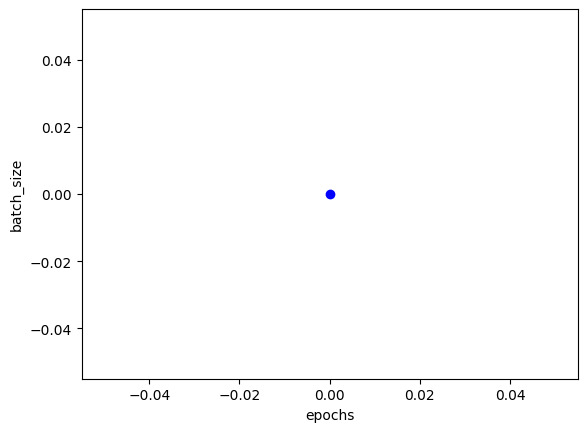

########### Interpreted Values: ###########


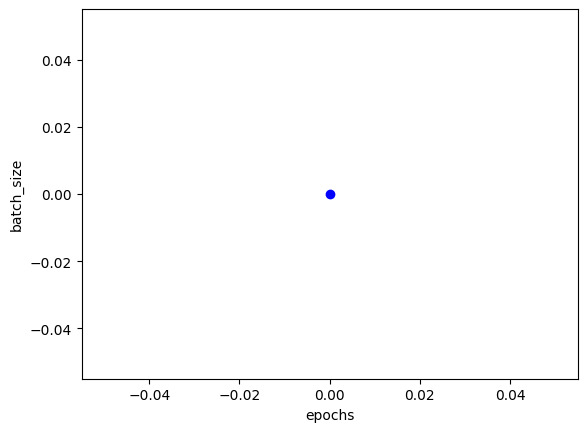

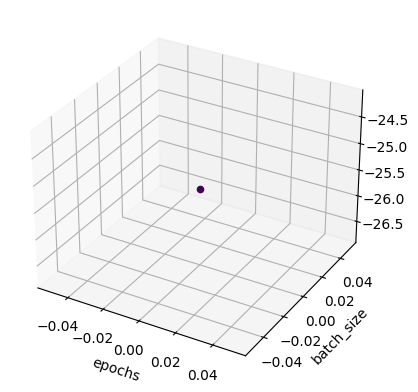

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 0.0
batch_size: 0.0
Resulting loss:
-25.460337185286313
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: 0.0
batch_size: 0.0
Resulting loss (Optimal value from optimization):
-25.460337185286313
Resulting loss (Optimal point evaluated):
-25.460337185286313
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 167.50820170884163
batch_size: -473.09025837045937
Resulting loss (Optimal value from optimization):
-25.460337185286313
Resulting loss (Optimal point evaluated):
-25.605515434597507
Done in 0ms.
Best score with Sparse Search: -25.460337185286313 optimized: -25.605515434597507
[-25.460337185286313]
[-246.70818784354398]
[-62.038670208717654]
[-25.460337185286313]
[-25.605515434597507]

################################################## C

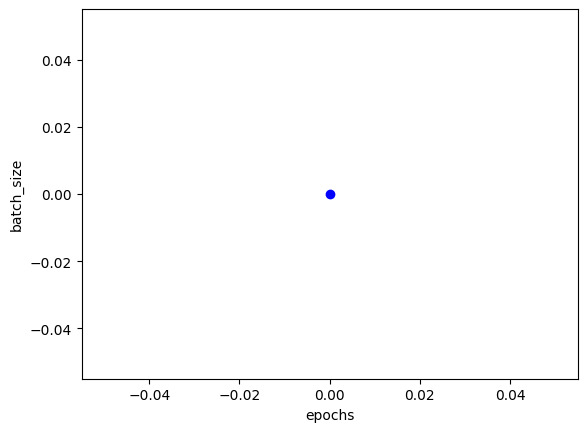

########### Interpreted Values: ###########


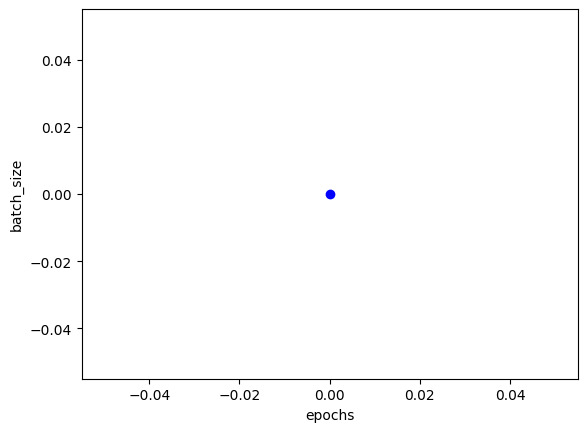

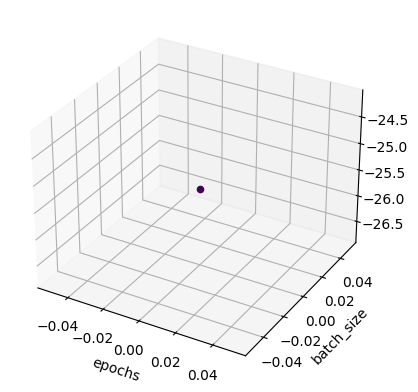

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: 0.0
batch_size: 0.0
Resulting loss:
-25.460337185286313
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after local optimization:
epochs: 0.0
batch_size: 0.0
Resulting loss (Optimal value from optimization):
-25.460337185286313
Resulting loss (Optimal point evaluated):
-25.460337185286313
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 402.5295470750856
batch_size: -337.58363898759137
Resulting loss (Optimal value from optimization):
-25.460337185286313
Resulting loss (Optimal point evaluated):
-373.30309061270106
Done in 0ms.
Best score with Sparse Search: -25.460337185286313 optimized: -373.30309061270106
[-25.460337185286313, -441.50075089951764]
[-246.70818784354398, -423.5379570994791]
[-62.038670208717654, -367.9727342927092]
[-25.460337185286313, -25.46033718528

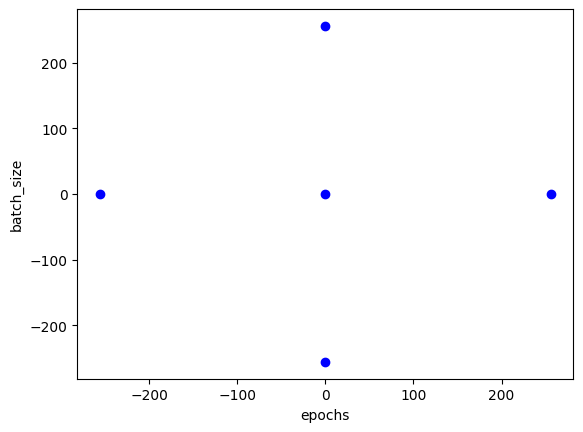

########### Interpreted Values: ###########


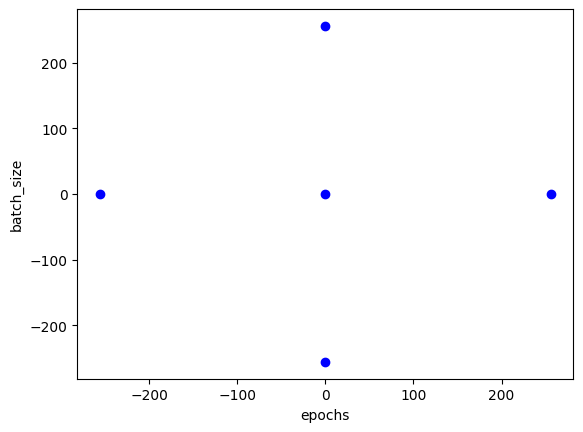

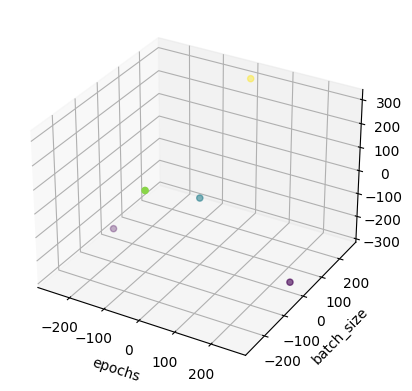

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 0.0
Resulting loss:
-273.2708453042725
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after local optimization:
epochs: -511.99940724467064
batch_size: -19.68320415730352
Resulting loss (Optimal value from optimization):
-717.7572606183523
Resulting loss (Optimal point evaluated):
-497.17028224280176
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: -511.902075652486
batch_size: -18.913060131592715
Resulting loss (Optimal value from optimization):
-717.5833081692808
Resulting loss (Optimal point evaluated):
-502.14074970119964
Done in 0ms.
Best score with Sparse Search: -273.2708453042725 optimized: -502.14074970119964
[-25.460337185286313, -441.50075089951764]
[-246.70818784354398, -423.5379570994791, -478.5385340047519]
[-62.038670208717654, -367.97

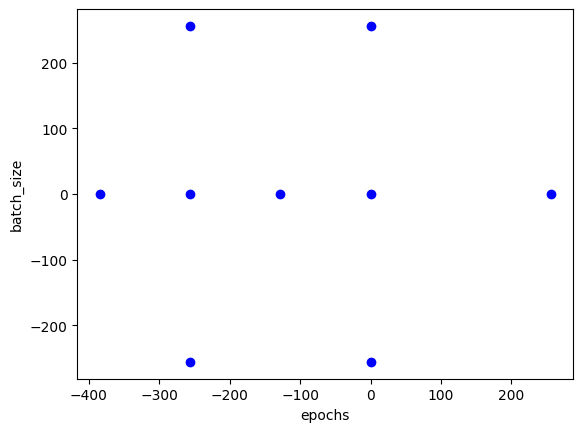

########### Interpreted Values: ###########


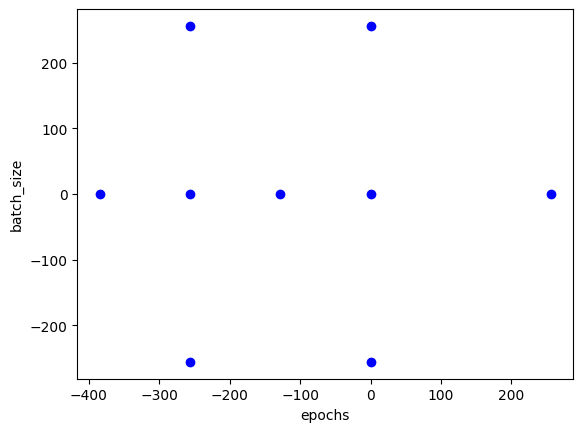

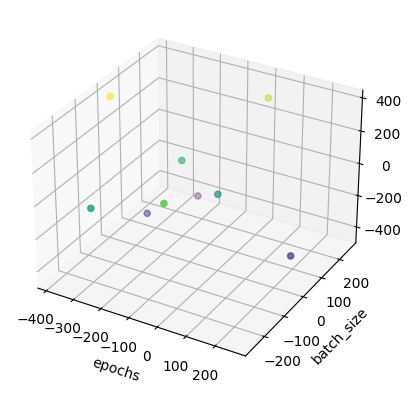

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.50075089951764
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -321.5656897902308
batch_size: 511.9990441939741
Resulting loss (Optimal value from optimization):
-742.5347556986501
Resulting loss (Optimal point evaluated):
-808.9597755619068
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Done in 0ms.
Optimizing (multi-start)...
Done in 0ms.

Optimal hyperparameters after global optimization:
epochs: -321.9363893997074
batch_size: 511.8691386610071
Resulting loss (Optimal value from optimization):
-742.3662606629675
Resulting loss (Optimal point evaluated):
-808.9597755619068
Best score with Sparse Search: -441.50075089951764 optimized: -808.9597755619068
[-25.460337185286313, -441.50075089951764, -314.6213848785689]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.323935

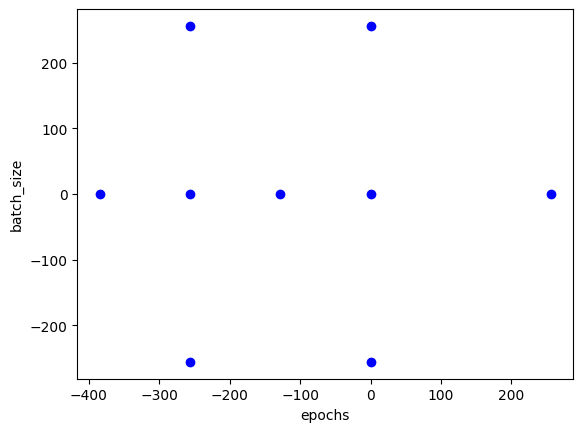

########### Interpreted Values: ###########


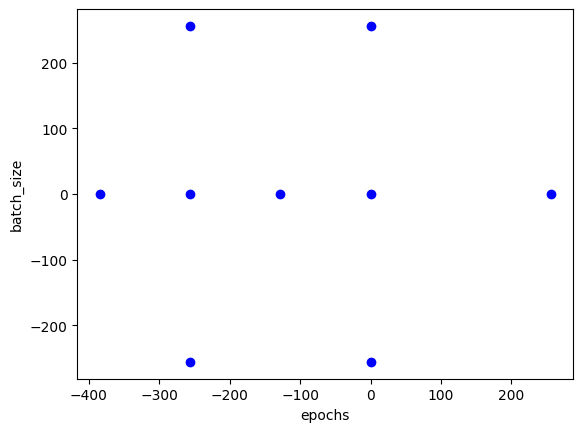

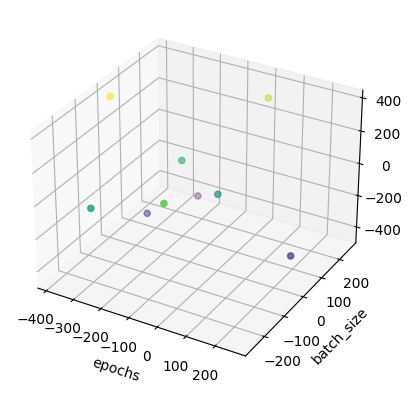

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.50075089951764
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after local optimization:
epochs: -321.5656897902308
batch_size: 511.9990441939741
Resulting loss (Optimal value from optimization):
-742.5347556986501
Resulting loss (Optimal point evaluated):
-808.9597755619068
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...
Done in 0ms.

Optimal hyperparameters after global optimization:
epochs: -323.0252272232295
batch_size: 510.7942504250275
Resulting loss (Optimal value from optimization):
-740.9188536321542
Resulting loss (Optimal point evaluated):
-797.4504334047883
Best score with Sparse Search: -441.50075089951764 optimized: -808.9597755619068
[-25.460337185286313, -441.50075089951764, -314.6213848785689]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.323935

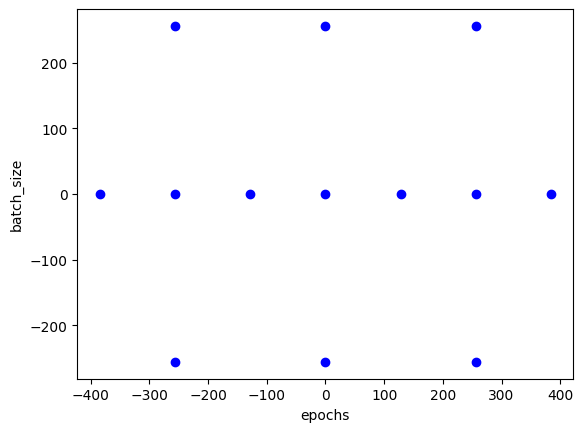

########### Interpreted Values: ###########


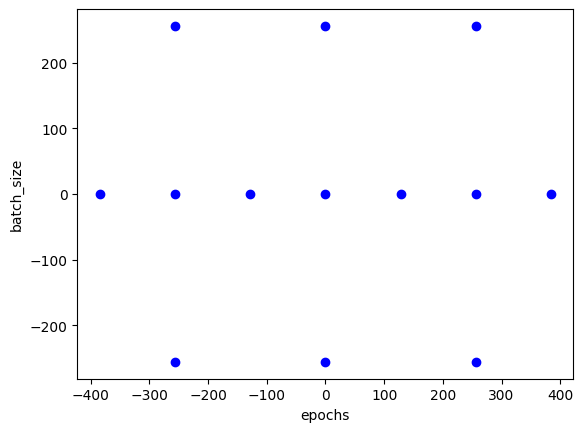

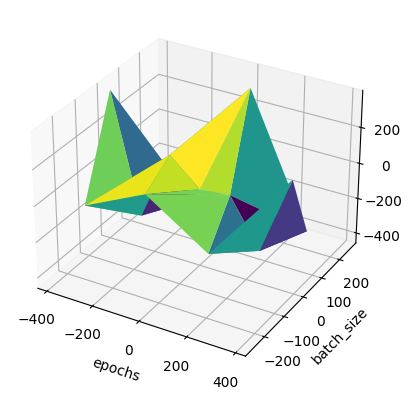

Solving linear system (automatic method)...

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.5007508995177
Done in 0ms.
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -353.81684496919
batch_size: 511.9998155307138
Resulting loss (Optimal value from optimization):
-921.9368051747122
Resulting loss (Optimal point evaluated):
-685.005278064499
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 511.9999999999998
batch_size: 512.0
Resulting loss (Optimal value from optimization):
-1249.8324064932294
Resulting loss (Optimal point evaluated):
-160.75174671576423
Done in 0ms.
Best score with Sparse Search: -441.5007508995177 optimized: -685.005278064499
[-25.460337185286313, -441.50075089951764, -314.6213848785689]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.3239357068914, -593.365

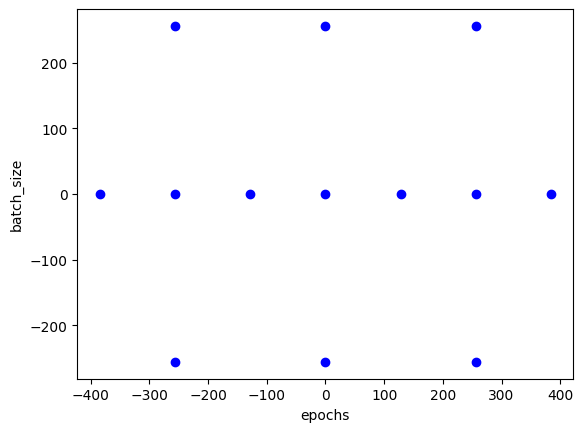

########### Interpreted Values: ###########


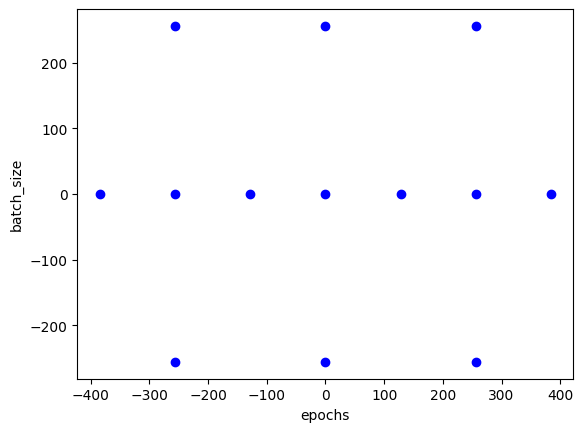

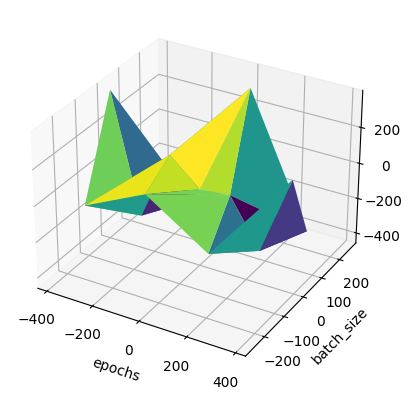

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.5007508995177
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after local optimization:
epochs: -353.81684496919
batch_size: 511.9998155307138
Resulting loss (Optimal value from optimization):
-921.9368051747122
Resulting loss (Optimal point evaluated):
-685.005278064499
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...
Done in 0ms.

Optimal hyperparameters after global optimization:
epochs: 512.0
batch_size: 512.0
Resulting loss (Optimal value from optimization):
-1249.8324064932049
Resulting loss (Optimal point evaluated):
-126.1679373846548
Best score with Sparse Search: -441.5007508995177 optimized: -685.005278064499
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.3239357068914, -

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 1.0401649499963241 seconds
With Hyperparameters: 
epochs: -495.799060507943
batch_size: -415.829373097866
Best score with Bayesian Optimization: -593.5257840726882

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 0ms.
########### Generated Grid: ###########


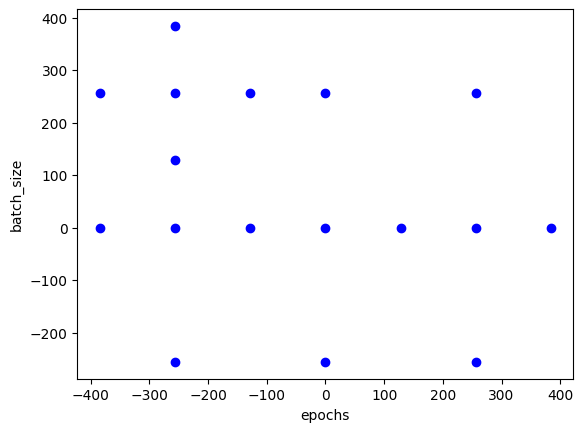

########### Interpreted Values: ###########


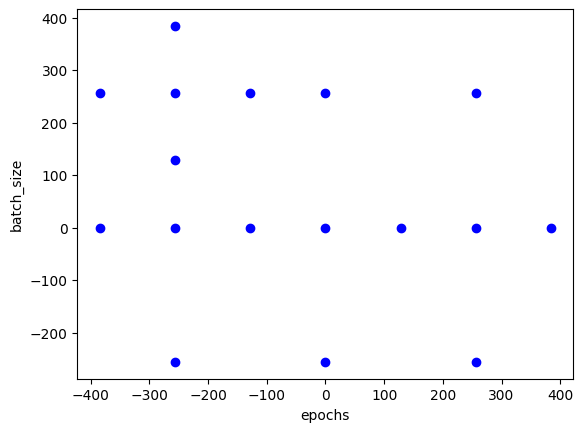

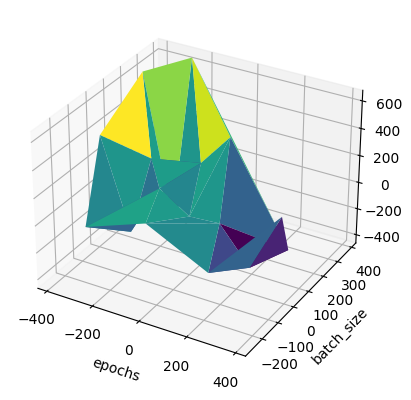

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.5007508995184
Optimizing (gradient descent)...
Done in 0ms.

Optimal hyperparameters after local optimization:
epochs: -248.85338813538027
batch_size: 260.898386520436
Resulting loss (Optimal value from optimization):
-446.236937683076
Resulting loss (Optimal point evaluated):
-499.73278612251954
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 510.33524662397224
batch_size: 511.92217590226664
Resulting loss (Optimal value from optimization):
-1836.7993419351963
Resulting loss (Optimal point evaluated):
-174.61957301196057
Done in 0ms.
Best score with Sparse Search: -441.5007508995184 optimized: -499.73278612251954
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Iterations took 8.882436594996761 seconds
With Hyperparameters: 
epochs: -380.19833919373855
batch_size: -402.195059092057
Best score with Bayesian Optimization: -711.087836799768

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 0ms.
########### Generated Grid: ###########


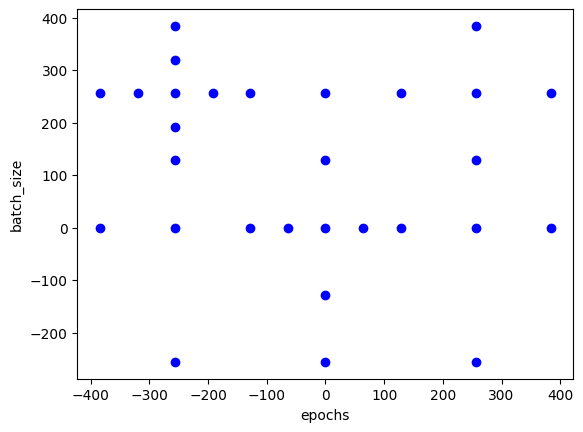

########### Interpreted Values: ###########


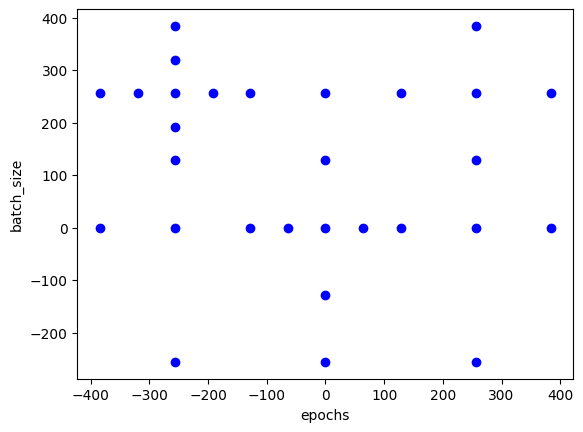

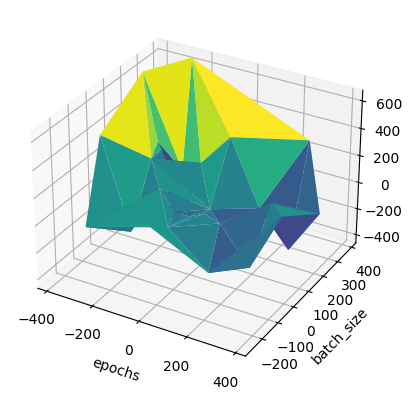

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 256.0
Resulting loss:
-441.5007508995188
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -234.716742484274
batch_size: 269.1214406555737
Resulting loss (Optimal value from optimization):
-524.2409545408498
Resulting loss (Optimal point evaluated):
-548.4428608353151
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: -234.7996088735651
batch_size: 268.85555051220297
Resulting loss (Optimal value from optimization):
-524.2292541864628
Resulting loss (Optimal point evaluated):
-546.3048881268104
Done in 1ms.
Best score with Sparse Search: -441.5007508995188 optimized: -548.4428608353151
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.53853400

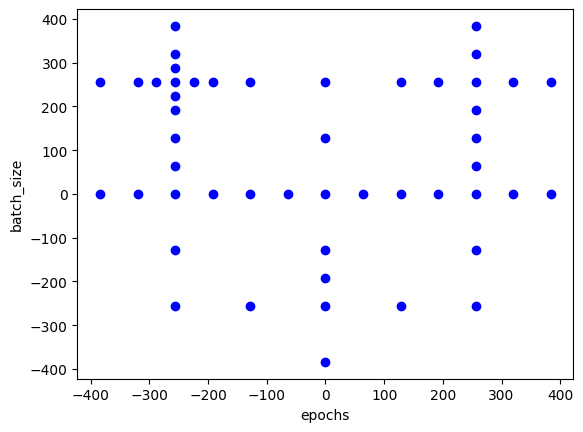

########### Interpreted Values: ###########


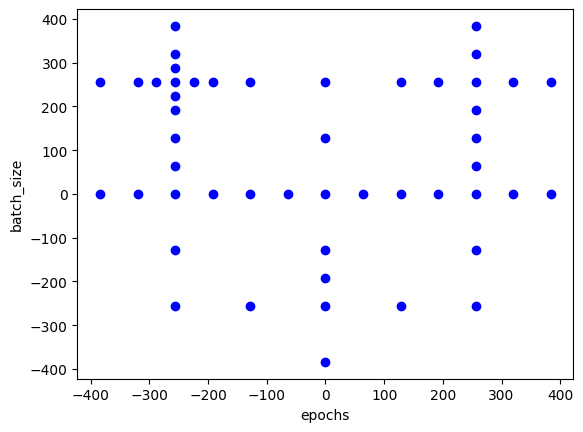

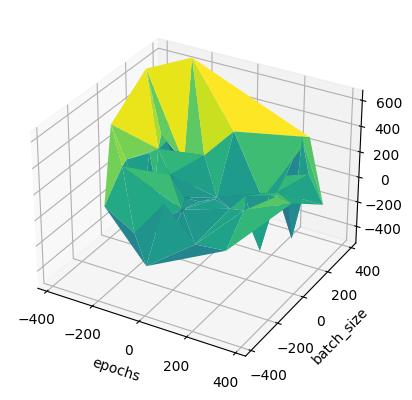

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 288.0
Resulting loss:
-512.1242494674232
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -236.37109196841965
batch_size: 276.4389708606594
Resulting loss (Optimal value from optimization):
-582.8487030897165
Resulting loss (Optimal point evaluated):
-552.9653326461398
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: -110.89956593710292
batch_size: -511.6817791950116
Resulting loss (Optimal value from optimization):
-1816.9360338063593
Resulting loss (Optimal point evaluated):
-333.5547475157721
Done in 1ms.
Best score with Sparse Search: -512.1242494674232 optimized: -552.9653326461398
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385

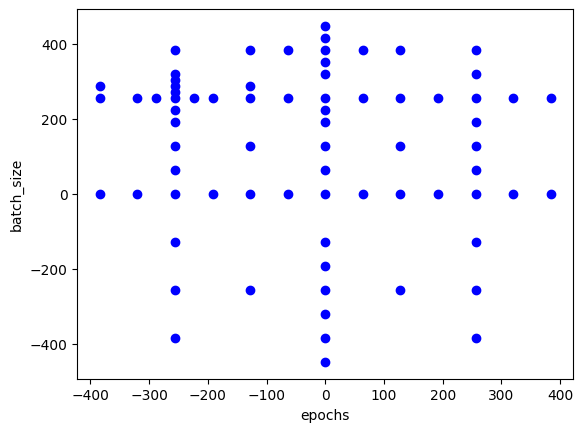

########### Interpreted Values: ###########


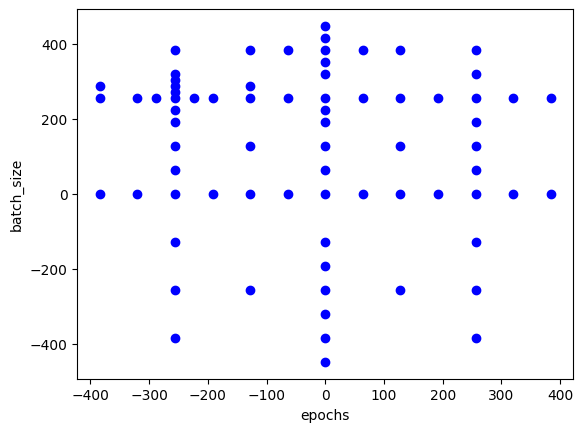

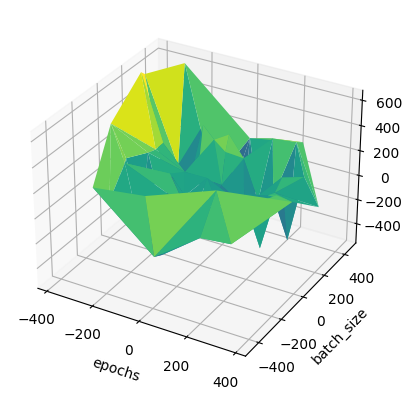

Solving linear system (automatic method)...
Done in 0ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 272.0
Resulting loss:
-537.1573307890917
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -249.7161007518501
batch_size: 275.8759737698239
Resulting loss (Optimal value from optimization):
-545.8689268738191
Resulting loss (Optimal point evaluated):
-556.1403461579347
20
Done in 0ms.
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: -112.68604976134498
batch_size: -355.9025555066979
Resulting loss (Optimal value from optimization):
-865.1851227476142
Resulting loss (Optimal point evaluated):
180.9335977187921
Done in 2ms.
Best score with Sparse Search: -537.1573307890917 optimized: -556.1403461579347
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385340

/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/maxi/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: 

Iterations took 37.28694040400114 seconds
With Hyperparameters: 
epochs: -454.3628536558145
batch_size: -380.4966102299141
Best score with Bayesian Optimization: -785.2520768486047

Performing sparse search
Adaptive grid generation (Ritter-Novak)...
Done in 1ms.
########### Generated Grid: ###########


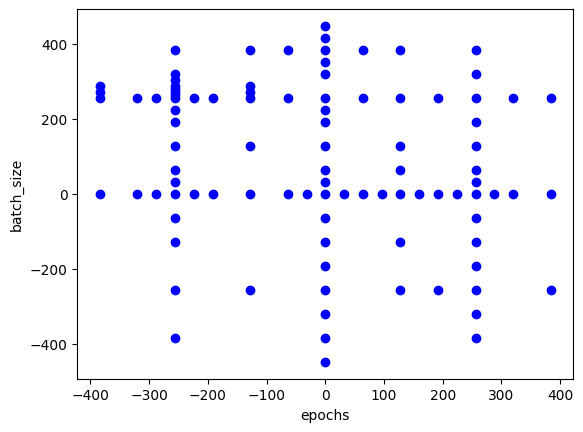

########### Interpreted Values: ###########


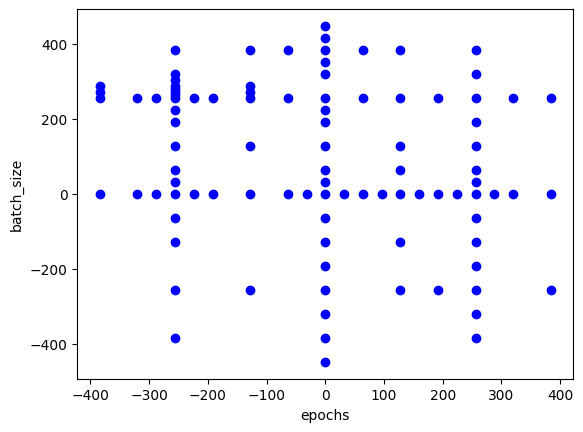

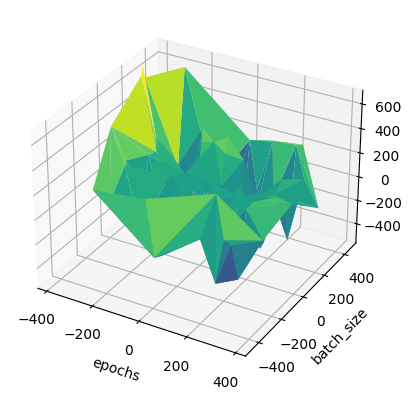

Solving linear system (automatic method)...
Done in 1ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 280.0
Resulting loss:
-540.4980311729427
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -243.777545469127
batch_size: 274.2199423641423
Resulting loss (Optimal value from optimization):
-556.6674954234202
Resulting loss (Optimal point evaluated):
-559.7494354347152
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...
Done in 2ms.
Optimal hyperparameters after global optimization:
epochs: 190.01382816049284
batch_size: -357.9598509573309
Resulting loss (Optimal value from optimization):
-782.5241748853026
Resulting loss (Optimal point evaluated):
336.7637063838114

Best score with Sparse Search: -540.4980311729427 optimized: -559.7494354347152
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.538534004

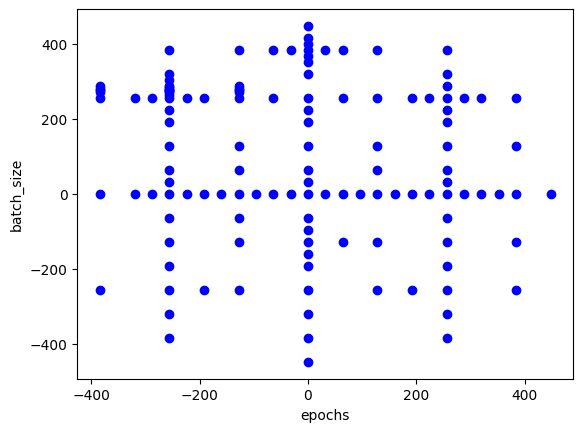

########### Interpreted Values: ###########


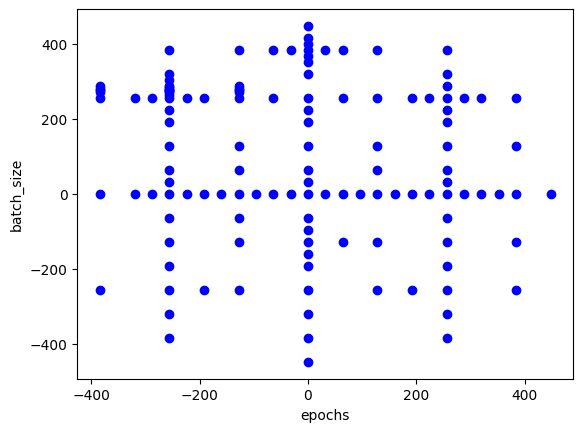

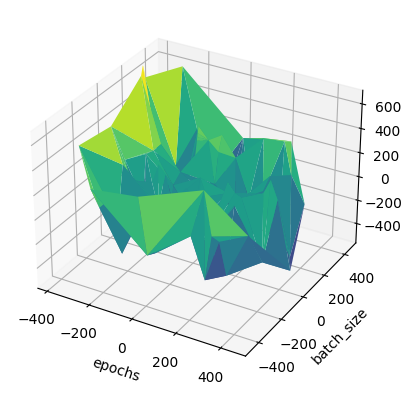

Solving linear system (automatic method)...
Done in 3ms.

Optimal hyperparameters so far:
epochs: -256.0
batch_size: 276.0
Resulting loss:
-542.7855173240663
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: -243.09812344091506
batch_size: 275.0824855669641
Resulting loss (Optimal value from optimization):
-558.8647678668552
Resulting loss (Optimal point evaluated):
-559.6907084820582
Done in 0ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 511.9949663429518
batch_size: -176.43613246382836
Resulting loss (Optimal value from optimization):
-4478.678154465665
Resulting loss (Optimal point evaluated):
-209.11185638686433
Done in 4ms.
Best score with Sparse Search: -542.7855173240663 optimized: -559.6907084820582
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.53853

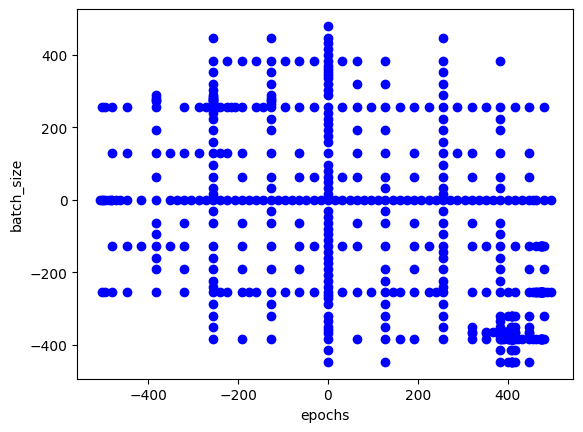

########### Interpreted Values: ###########


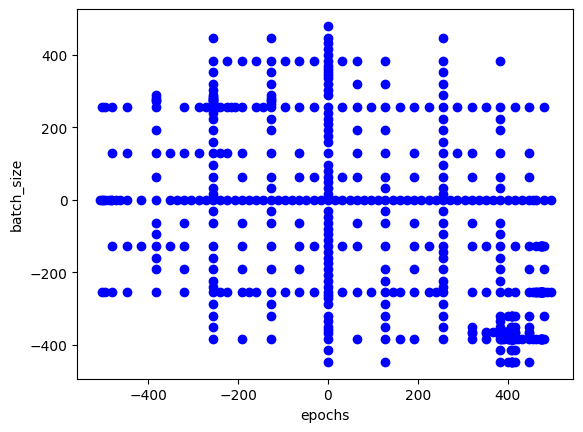

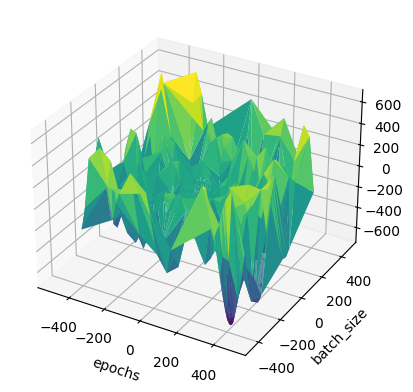

Solving linear system (automatic method)...
Done in 7566ms.

Optimal hyperparameters so far:
epochs: 400.0
batch_size: -367.0
Resulting loss:
-716.3915435877435
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: 399.4867912548127
batch_size: -367.1986585633575
Resulting loss (Optimal value from optimization):
-716.6183852296062
Resulting loss (Optimal point evaluated):
-716.5067378864809
Done in 3ms.
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 512.0
batch_size: 512.0
Resulting loss (Optimal value from optimization):
-11802.889520926661
Resulting loss (Optimal point evaluated):
-126.1679373846548
Done in 7ms.
Best score with Sparse Search: -716.3915435877435 optimized: -716.5067378864809
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.323935706

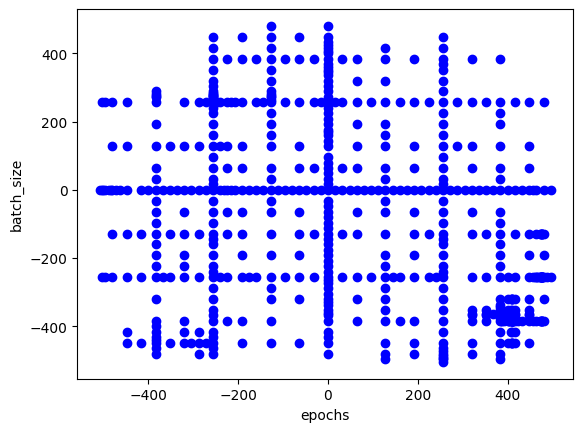

########### Interpreted Values: ###########


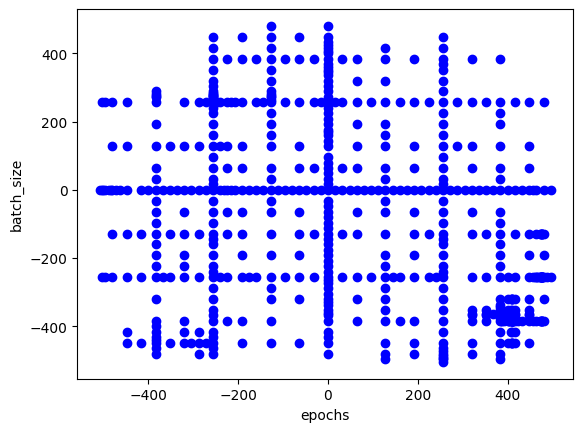

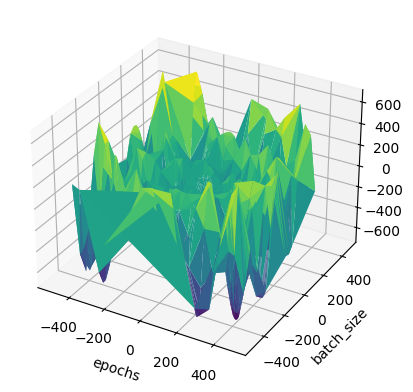

Solving linear system (automatic method)...
Done in 14548ms.

Optimal hyperparameters so far:
epochs: 400.0
batch_size: -367.0
Resulting loss:
-716.3915435880147
Optimizing (gradient descent)...

Optimal hyperparameters after local optimization:
epochs: 511.99929257538133
batch_size: -298.4376239465786
Resulting loss (Optimal value from optimization):
-1097.8843503599153
Resulting loss (Optimal point evaluated):
-103.40351400172008
20
[5.00000000000000000000e-01, 5.00000000000000000000e-01]
Done in 1ms.
Optimizing (multi-start)...

Optimal hyperparameters after global optimization:
epochs: 512.0
batch_size: 512.0
Resulting loss (Optimal value from optimization):
-10571.606487666337
Resulting loss (Optimal point evaluated):
-126.1679373846548
Done in 9ms.
Best score with Sparse Search: -716.3915435880147 optimized: -716.3915435880147
[-25.460337185286313, -441.50075089951764, -314.6213848785689, -548.6509132912579]
[-246.70818784354398, -423.5379570994791, -478.5385340047519, -437.32393

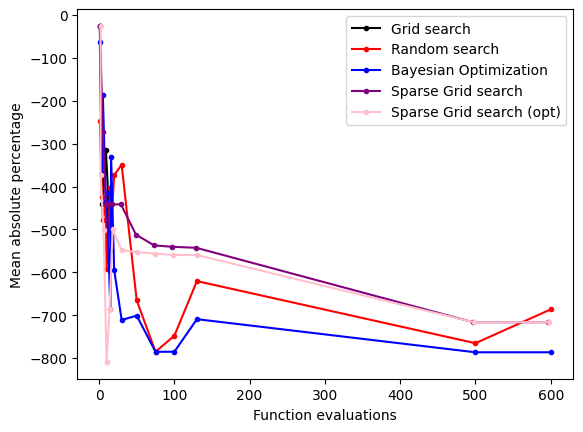

In [11]:
os.mkdir(DIRECTORY)

f = open(DIRECTORY+"/configurations.txt", "a")
f.write("Dimension of hyperparameter space: " +
        str(len(hyperparameterspace)) + "\n")
for key in hyperparameterspace.keys():
    f.write("\n" + key + ": " + str(hyperparameterspace[key]))
f.write("\n\nSparse grid degree: " + str(SPARSE_PARAMS[0]))
f.write("\nSparse grid adaptivity param: " + str(SPARSE_PARAMS[1]))
f.write("\nSparse grid optimization alg: " + str(SPARSE_PARAMS[2]))
f.write("\nBUDGETS: " + str(BUDGETS))
f.close()

ids = [233211]#, 359952, 359931, 359949, 359938]
# [359940, 317614, 359934, 359946, 359932, 233214, 359943]

for i in range(len(ids)):
    print("######################################################################################################################################################")
    print("Current Dataset:", (i+1), "of", len(ids), "with id:", ids[i])

    dataset = HPO.Dataset(task_id=ids[i])

    print("The average value for target is:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    current_dataset_grid = []
    current_dataset_random = []
    current_dataset_bayesian = []
    current_dataset_sparse = []
    current_dataset_sparse_opt = []

    current_dataset_grid_cost = []
    current_dataset_random_cost = []
    current_dataset_bayesian_cost = []
    current_dataset_sparse_cost = []
    current_dataset_sparse_opt_cost = []

    ################## MODEL AND FUNCTION DEFINITION ####################

    def evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=True):

        return -epochs * math.sin(math.sqrt(abs(epochs - (batch_size + 47)))) - (batch_size + 47) * math.sin(math.sqrt(abs((batch_size + 47 + 0.5 * epochs))))

        # return epochs + batch_size + learning_rate + number_of_layers + neurons_per_layer

        kfold = KFold(n_splits=CV)

        split = (kfold.split(dataset.get_X(), dataset.get_Y()))

        values = []

        numeric_features = [not x for x in dataset.get_categorical_indicator()]
        numeric_transformer = Pipeline(
            steps=[("imputer", SimpleImputer(strategy="median")),
                   ("scaler", StandardScaler())]
        )

        categorical_transformer = Pipeline(
            steps=[
                ("encoder", OneHotEncoder(
                    handle_unknown="infrequent_if_exist", sparse_output=False)),
                # ("selector", SelectPercentile(chi2, percentile=50)),
            ]
        )

        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer,
                 dataset.get_categorical_indicator()),
            ]
        )

        for i, (train_index, test_index) in enumerate(split):

            if deterministic:
                reset_seeds()

            X_train = dataset.get_X()[train_index]
            Y_train = dataset.get_Y()[train_index]

            X_val = dataset.get_X()[test_index]
            Y_val = dataset.get_Y()[test_index]

            preprocessor.fit(X_train, Y_train)

            X_train = preprocessor.transform(X_train)
            X_val = preprocessor.transform(X_val)

            regressor = KerasRegressor(model=create_model,
                                       learning_rate=learning_rate,
                                       input_dim=len(
                                           X_train[0]),
                                       number_layers=number_of_layers,
                                       neurons_per_layer=neurons_per_layer,
                                       verbose=0)

            regressor = TransformedTargetRegressor(regressor=regressor,
                                                   transformer=StandardScaler())

            regressor.fit(X_train, Y_train, epochs=epochs,
                          batch_size=batch_size, shuffle=False)

            Y_predicted = regressor.predict(X_val)
            # error = sklearn.metrics.mean_absolute_error(Y_predicted, Y_val)
            error = sklearn.metrics.mean_absolute_percentage_error(
                Y_predicted, Y_val)
            values.append(error)

            del regressor
            K.clear_session()

        result = sum(values)/len(values)
        return result

    def blackboxfunction_grid(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = 1 # params[2]

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer)

    def blackboxfunction_random(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        learning_rate = 1 # params[2]

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, learning_rate, number_of_layers, neurons_per_layer, deterministic=False)

    def blackboxfunction_bayesian(params):
        # index = int(params[0]*(len(hyperparameterspace_special["loss"])-1))
        # hyperparameterspace_special["loss"][index]

        epochs = int(params[0])

        batch_size = int(params[1])

        model_learning_rate = 1 #10 ** (params[2])

        number_of_layers = 1  # int(params[3])

        neurons_per_layer = 40  # int(params[4])

        return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer, deterministic=False)

    ##################### Function for sparse grid search #####################

    class ExampleFunction(pysgpp.ScalarFunction):

        def __init__(self):
            super(ExampleFunction, self).__init__(
                len(hyperparameterspace.keys()))

        def eval(self, x):
            # index = int(x[0]*(len(hyperparameterspace_special["loss"])-1))
            # hyperparameterspace_special["loss"][index]

            epochs = int(HPO.from_standard(
                hyperparameterspace_special["epochs"][0], hyperparameterspace_special["epochs"][1], x[0]))

            batch_size = int(HPO.from_standard(
                hyperparameterspace_special["batch_size"][0], hyperparameterspace_special["batch_size"][1], x[1]))

            # HPO.from_standard_log(hyperparameterspace_special["learning_rate"][
            model_learning_rate = 1
            #                  0], hyperparameterspace_special["learning_rate"][1], x[2])

            number_of_layers = 1  # int(HPO.from_standard(
            # hyperparameterspace_special["number_layers"][0], hyperparameterspace_special["number_layers"][1], x[3]))

            neurons_per_layer = 40  # int(HPO.from_standard(
            # hyperparameterspace_special["neurons_per_layer"][0], hyperparameterspace_special["neurons_per_layer"][1], x[4]))

            return evaluate_model(epochs, batch_size, model_learning_rate, number_of_layers, neurons_per_layer)

    ##### For each dataset: run models with different budget #####
    for BUDGET in BUDGETS:

        print("\n################################################## Current Budget:",
              BUDGET, "##################################################")

        ############################## GRID SEARCH #######################
        grid_sizes = [x ** len(hyperparameterspace) for x in range(9)]
        if BUDGET in grid_sizes:
            print("\nPerforming grid search")
            optimization = HPO.GridSearchOptimization(
                dataset, blackboxfunction_grid, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

            result, cost = optimization.fit()

            index_best = 0
            for m in range(len(result)):
                if result[m][1] < result[index_best][1]:
                    index_best = m

            best_score = result[index_best][1]
            best_params = result[index_best][0]

            if VERBOSE > 0:
                print("With Hyperparameters: ")
                m = 0
                for key in hyperparameterspace.keys():
                    if hyperparameterspace[key][0] == "list":
                        index = int(
                            best_params[m]*(len(hyperparameterspace_special[key])-1))
                        print(key + ": " +
                              str(hyperparameterspace_special[key][index]))
                    else:
                        print(key + ": " + str(best_params[m]))
                    m += 1

            print("Best score with Grid search:", best_score)

            current_dataset_grid.append(best_score)
            current_dataset_grid_cost.append(cost)

            K.clear_session()

        # ########################### RANDOM SEARCH #######################
        print("\nPerforming random search")

        optimization = HPO.RandomSearchOptimization(
            dataset, blackboxfunction_random, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, cv=CV)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Random search:", best_score)

        current_dataset_random.append(best_score)
        current_dataset_random_cost.append(cost)

        K.clear_session()

        ########################### BAYESIAN OPT #####################
        print("\nPerforming bayesian optimization")

        optimization = HPO.BayesianOptimization(
            dataset, blackboxfunction_bayesian, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE)

        result, cost = optimization.fit()

        index_best = 0
        for m in range(len(result)):
            if result[m][1] < result[index_best][1]:
                index_best = m

        best_score = result[index_best][1]
        best_params = result[index_best][0]

        if VERBOSE > 0:
            print("With Hyperparameters: ")
            m = 0
            for key in hyperparameterspace.keys():
                if hyperparameterspace[key][0] == "list":
                    index = int(
                        best_params[m]*(len(hyperparameterspace_special[key])-1))
                    print(key + ": " +
                          str(hyperparameterspace_special[key][index]))
                elif hyperparameterspace[key][0] == "interval-log":
                    print(key + ": " + str(10 ** best_params[m]))
                else:
                    print(key + ": " + str(best_params[m]))
                m += 1

        print("Best score with Bayesian Optimization:", best_score)

        current_dataset_bayesian.append(best_score)
        current_dataset_bayesian_cost.append(BUDGET)

        K.clear_session()

        ########################### SPARSE OPT ############################

        costs_sparse = [1]
        for _ in range(40):
            costs_sparse.append(costs_sparse[-1]+2*len(hyperparameterspace))

        #if BUDGET in costs_sparse:
        print("\nPerforming sparse search")

        f = ExampleFunction()

        optimization = HPO.SparseGridSearchOptimization(
            dataset, f, hyperparameterspace, budget=BUDGET, verbosity=VERBOSE, degree=SPARSE_PARAMS[0], adaptivity=SPARSE_PARAMS[1], optimizer=SPARSE_PARAMS[2])

        result = optimization.fit()

        print("Best score with Sparse Search:",
                result[0][1], "optimized:", result[0][3])

        current_dataset_sparse.append(result[0][1])
        current_dataset_sparse_opt.append(result[0][3])

        current_dataset_sparse_cost.append(result[1])
        current_dataset_sparse_opt_cost.append(result[1]+1)

        K.clear_session()

        print(current_dataset_grid)
        print(current_dataset_random)
        print(current_dataset_bayesian)
        print(current_dataset_sparse)
        print(current_dataset_sparse_opt)

    GRID_RESULT.append(current_dataset_grid)
    RANDOM_RESULT.append(current_dataset_random)
    BAYESIAN_RESULT.append(current_dataset_bayesian)
    SPARSE_RESULT.append(current_dataset_sparse)
    SPARSE_RESULT_OPTIMIZED.append(current_dataset_sparse_opt)

    GRID_COST.append(current_dataset_grid_cost)
    RANDOM_COST.append(current_dataset_random_cost)
    BAYESIAN_COST.append(current_dataset_bayesian_cost)
    SPARSE_COST.append(current_dataset_sparse_cost)
    SPARSE_COST_OPTIMIZED.append(current_dataset_sparse_opt_cost)

    print("###################### Current dataset",
          ids[i], "######################")

    dataset = HPO.Dataset(task_id=ids[i])

    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))

    # plotting the points
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-',
             color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-',
             color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-',
             color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-',
             color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i],
             '.-', color='pink', label="Sparse Grid search (opt)")

    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')

    # show a legend on the plot
    plt.legend()

    plt.savefig(DIRECTORY + "/task_id" + str(ids[i]))
    # function to show the plot
    plt.show()


### Print lines

###################### Current dataset 233211 ######################
Target average: tensor([3932.8892])
Min target: tensor([326.]) Max target: tensor([18823.])


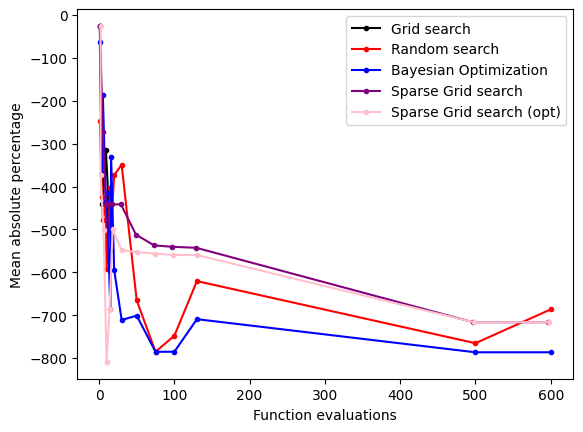

In [12]:
for i in range(len(ids)):
    print("###################### Current dataset", ids[i], "######################")
    
    dataset = HPO.Dataset(task_id=ids[i])
    
    print("Target average:", sum(
        dataset.get_Y()/len(dataset.get_Y())))
    print("Min target:", min(dataset.get_Y()),
          "Max target:", max(dataset.get_Y()))


    # plotting the points 
    plt.plot(GRID_COST[i], GRID_RESULT[i], '.-', color='black', label="Grid search")
    plt.plot(RANDOM_COST[i], RANDOM_RESULT[i], '.-', color='red', label="Random search")
    plt.plot(BAYESIAN_COST[i], BAYESIAN_RESULT[i], '.-', color='blue', label="Bayesian Optimization")
    plt.plot(SPARSE_COST[i], SPARSE_RESULT[i], '.-', color='purple', label="Sparse Grid search")
    plt.plot(SPARSE_COST_OPTIMIZED[i], SPARSE_RESULT_OPTIMIZED[i], '.-', color='pink', label="Sparse Grid search (opt)")
    
    # naming the x axis
    plt.xlabel('Function evaluations')
    # naming the y axis
    plt.ylabel('Mean absolute percentage')
    
    # show a legend on the plot
    plt.legend()
    
    # function to show the plot
    plt.show()